In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

import random

# Loading Dataset

In [ ]:
dataset_mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = dataset_mnist

# remember to put brackets

# Pre-processing Data


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
#normalization to small range ("-1 to 1" OR "0 to 1") increases model reliability

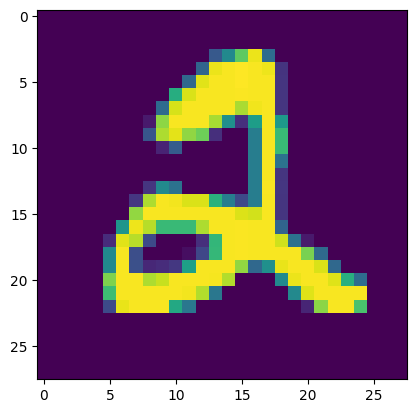

In [ ]:
plt.imshow(random.choice(X_train))
plt.show()

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

# each tuple [] denotes a number
# eg- first element, 5 is represented by (0,0,0,0,0, 1,0,0,0,0)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Defining the Network

In [ ]:
model = Sequential([                                        # We define layers, separating each layer using comma
    Input(shape = (X_train.shape[1], X_train.shape[2])),    # X_train.shape = (60,000 , 28, 28)
    Flatten(),                                              # converted from 28x28 to 784x1 (1 dimensional), as dense layers in NNs need 1D stuff
    Dense(128, activation = 'relu'),                        # relu helps catch non-linearity
    #Dropout(0.2),                                           # sets random 20% weights to 0, to prevent overfitting
    Dense(64, activation = 'relu'),                         # halving the number of neurons
    Dropout(0.2),
    Dense(10, activation = 'softmax'),                      # converts into set of probabilities
])

# Training Model

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# stochastic gradient descent, loss func for one-hot encoding (diff between predicted probabilities and one-hot encoded labels)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=11, validation_data=(X_test, y_test))

#epochs is the number of complete iterations on the dataset.

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6498 - loss: 1.1627 - val_accuracy: 0.9107 - val_loss: 0.3219
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8929 - loss: 0.3717 - val_accuracy: 0.9286 - val_loss: 0.2492
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9171 - loss: 0.2896 - val_accuracy: 0.9375 - val_loss: 0.2106
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9276 - loss: 0.2497 - val_accuracy: 0.9471 - val_loss: 0.1866
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9376 - loss: 0.2171 - val_accuracy: 0.9501 - val_loss: 0.1694
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9421 - loss: 0.1965 - val_accuracy: 0.9513 - val_loss: 0.1571
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9475 - loss: 0.1820 - val_accuracy: 0.9567 - val_loss: 0.1440
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9523 - loss: 0.1628 

# Plotting Loss and Accuracy

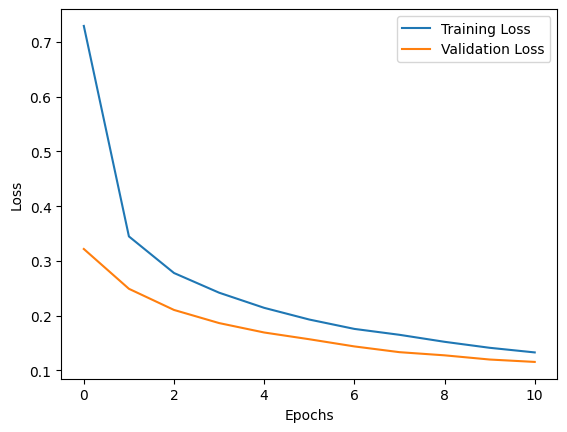

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

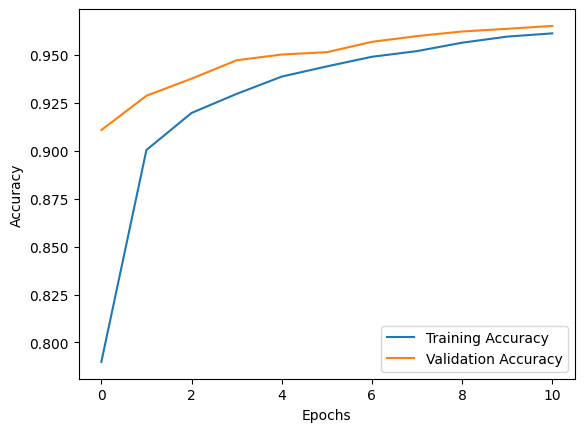

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1353


# Predictions

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Actual label:- 6
Predicted label:- 6


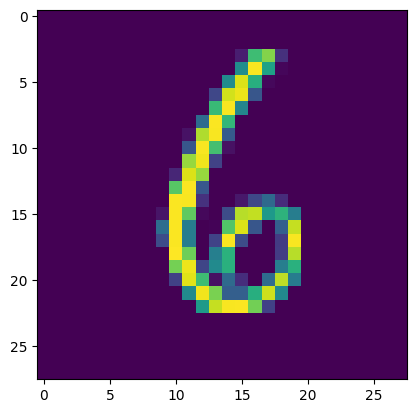

In [ ]:
plt.imshow(X_test[140])

print("Actual label:-", np.argmax(y_test[140]))
print("Predicted label:-", np.argmax(y_pred[140]))

# np.argmax returns highest probability wala